Метод главных компонент / сколько максимум можно "выкинуть"  данных до изменения рейтинга


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import random
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [31]:
df =pd.read_excel('/content/drive/MyDrive/mmp/Food rating.xlsx', index_col= 'Продукты')
# df_std = StandardScaler().fit_transform(df.fillna(0))
df

,"Калорийность, кКал","Цена 100г, руб.",Белки,Жиры,Углеводы,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,Бишук
Продукты,,,,,,,,,,,,,,,,,,
Устрицы,72.0,85.0,9.0,2.0,4.4,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9,6.0
Арахиc соленый,640.0,69.0,25.0,52.0,17.0,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3,2.0
"Молоко 2,5%",42.0,5.9,3.4,2.5,5.0,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5,NaN
Макароны,371.0,34.0,3.6,0.4,20.0,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6,1.0
Овсяное молоко 3.2%,250.0,8.0,1.0,3.2,6.5,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7,NaN
Шоколад,545.0,100.0,5.0,33.0,56.5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2,4.0
"Сырок ""РОСТАГРОЭКСПОРТ"" творожный глазированный с ""Варенкой""",360.7,35.6,7.7,19.1,39.5,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8,5.0
Кефир 3.2%,57.0,5.9,3.0,3.2,4.0,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1,NaN
Гречневая крупа,334.0,4.0,12.0,2.0,67.0,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4,3.0


In [32]:
dft=df.T
dft[5:] = 1/dft[5:] 

df_std = StandardScaler().fit_transform(df.fillna(0)).T

pp = (dft[:5].T *10) / dft[:5].T.sum()
df = pd.concat([dft[5:].T,pp], sort=False , axis = 1)
df

,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,Бишук,"Калорийность, кКал","Цена 100г, руб.",Белки,Жиры,Углеводы
Продукты,,,,,,,,,,,,,,,,,,
Устрицы,0.250000,NaN,NaN,NaN,0.111111,0.200000,NaN,NaN,NaN,NaN,0.333333,0.111111,0.166667,0.269491,2.446747,1.291248,0.170358,0.200091
Арахиc соленый,0.500000,0.166667,0.250000,0.125000,0.142857,0.250000,0.333333,0.333333,NaN,0.250000,0.166667,0.333333,0.500000,2.395479,1.986183,3.586801,4.429302,0.773079
"Молоко 2,5%",0.200000,1.000000,0.200000,0.200000,0.250000,0.333333,0.125000,0.250000,0.500000,0.333333,0.200000,0.200000,NaN,0.157203,0.169833,0.487805,0.212947,0.227376
Макароны,0.142857,0.142857,0.500000,0.333333,0.500000,0.125000,0.250000,0.166667,0.333333,0.200000,NaN,0.166667,1.000000,1.388629,0.978699,0.516499,0.034072,0.909504
Овсяное молоко 3.2%,NaN,0.500000,0.142857,0.500000,0.166667,0.142857,0.200000,0.200000,0.142857,NaN,0.142857,0.142857,NaN,0.935734,0.230282,0.143472,0.272572,0.295589
Шоколад,0.333333,0.250000,1.000000,0.111111,0.200000,NaN,1.000000,1.000000,0.166667,0.166667,1.000000,0.500000,0.250000,2.039900,2.878526,0.717360,2.810903,2.569350
"Сырок ""РОСТАГРОЭКСПОРТ"" творожный глазированный с ""Варенкой""",NaN,0.333333,0.333333,NaN,1.000000,0.500000,0.166667,0.500000,1.000000,1.000000,0.500000,0.125000,0.200000,1.350077,1.024755,1.104735,1.626917,1.796271
Кефир 3.2%,0.166667,0.200000,0.125000,0.250000,0.125000,1.000000,0.142857,0.142857,0.250000,0.142857,NaN,1.000000,NaN,0.213347,0.169833,0.430416,0.272572,0.181901
Гречневая крупа,1.000000,0.125000,0.166667,1.000000,0.333333,0.166667,0.500000,0.125000,0.200000,0.500000,0.250000,0.250000,0.333333,1.250140,0.115141,1.721664,0.170358,3.046839


## Примерно отнормировав данные, следуя принципу tbtb посмотрим какие продукты получили наибольшее количество "баллов" и исходя из этих данных составим рейтинг, относительно него потом посторим сравнение рейтингов.


In [33]:
df.T.sum()

Продукты
Устрицы                                                           5.550158
Арахиc соленый                                                   16.522033
Молоко  2,5%                                                      5.046831
Макароны                                                          7.688117
Овсяное молоко 3.2%                                               4.158602
Шоколад                                                          16.993816
Сырок "РОСТАГРОЭКСПОРТ" творожный глазированный с "Варенкой"     12.561088
Кефир 3.2%                                                        4.813308
Гречневая крупа                                                  11.254143
dtype: float64

In [34]:
Rating = [6,2,7,5,9,1,3,8,4]
df['Rating'] = Rating 
df = df.sort_values(by='Rating')
df = df.T.drop("Rating")
df=df.T
df

,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,Бишук,"Калорийность, кКал","Цена 100г, руб.",Белки,Жиры,Углеводы
Продукты,,,,,,,,,,,,,,,,,,
Шоколад,0.333333,0.250000,1.000000,0.111111,0.200000,NaN,1.000000,1.000000,0.166667,0.166667,1.000000,0.500000,0.250000,2.039900,2.878526,0.717360,2.810903,2.569350
Арахиc соленый,0.500000,0.166667,0.250000,0.125000,0.142857,0.250000,0.333333,0.333333,NaN,0.250000,0.166667,0.333333,0.500000,2.395479,1.986183,3.586801,4.429302,0.773079
"Сырок ""РОСТАГРОЭКСПОРТ"" творожный глазированный с ""Варенкой""",NaN,0.333333,0.333333,NaN,1.000000,0.500000,0.166667,0.500000,1.000000,1.000000,0.500000,0.125000,0.200000,1.350077,1.024755,1.104735,1.626917,1.796271
Гречневая крупа,1.000000,0.125000,0.166667,1.000000,0.333333,0.166667,0.500000,0.125000,0.200000,0.500000,0.250000,0.250000,0.333333,1.250140,0.115141,1.721664,0.170358,3.046839
Макароны,0.142857,0.142857,0.500000,0.333333,0.500000,0.125000,0.250000,0.166667,0.333333,0.200000,NaN,0.166667,1.000000,1.388629,0.978699,0.516499,0.034072,0.909504
Устрицы,0.250000,NaN,NaN,NaN,0.111111,0.200000,NaN,NaN,NaN,NaN,0.333333,0.111111,0.166667,0.269491,2.446747,1.291248,0.170358,0.200091
"Молоко 2,5%",0.200000,1.000000,0.200000,0.200000,0.250000,0.333333,0.125000,0.250000,0.500000,0.333333,0.200000,0.200000,NaN,0.157203,0.169833,0.487805,0.212947,0.227376
Кефир 3.2%,0.166667,0.200000,0.125000,0.250000,0.125000,1.000000,0.142857,0.142857,0.250000,0.142857,NaN,1.000000,NaN,0.213347,0.169833,0.430416,0.272572,0.181901
Овсяное молоко 3.2%,NaN,0.500000,0.142857,0.500000,0.166667,0.142857,0.200000,0.200000,0.142857,NaN,0.142857,0.142857,NaN,0.935734,0.230282,0.143472,0.272572,0.295589


## Поиск главных компонент

Будем ориентироваться только на первую главную компоненту


In [35]:
pca = PCA(n_components=1)
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
num = 0
coord = list()
osi = [np.array([0,0,0,0,0,0,0,0,0])]

while num < 100:
  i = random.randint(0,len(df_std)-1)
  j = random.randint(0,len(df_std[i])-1)
  if df_std[i][j] != 0:
    df_std[i][j] = 0
    osi.append(pca.components_[0])   #сохраняем координаты главных осей чтобы потом считать изменение угла
    num+=1  

In [37]:
def unit_vector(vector):
  
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):

    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [38]:
corners = []
for corner in range(len(osi)-1):
  corners.append(angle_between(osi[corner],osi[corner+1]))
max(corners[1:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

Была теория, что расположение главной оси меняется и я хотел посмотреть изменение угла следующей оси относительно предыдущей, но как оказалось она остается на месте и угол всегда равен 0... Но функции и код написал, так что жалко стирать :)


In [147]:
def get_coord_random():                                                                # Меняем значения на случайное значение в столбце
  df =pd.read_excel('/content/drive/MyDrive/mmp/Food rating.xlsx', index_col= 'Продукты')
  dft=df.T
  df_std = StandardScaler().fit_transform(df.fillna(0).T)


  num = 0
  coord = list()

  for i in range(len(df_std)):
    for j in range(len(df_std[i])): 
      if df_std[i][j] == 0:
        k = random.randint(0,len(df_std[i])-1)
        if k == j:
          k = random.randint(0,len(df_std[i])-1)
        df_std[i][j] =  df_std[i][k]

  while num < 100:
    i = random.randint(0,len(df_std)-1)
    j = random.randint(0,len(df_std[i])-1)
    k = random.randint(0,len(df_std[i])-1)
    if k == j: 
      k = random.randint(0,len(df_std[i])-1)

    df_std[i][j] =  df_std[i][k]

    gg = pca.transform(df_std)        
    gg = np.resize(gg,(1,len(gg)))     
    coord.append(gg.tolist()[0])      

    num+=1  

  return coord   

In [100]:
def get_coord_mean():                                                                # Меняем значения на среднее значение в столбце
  df =pd.read_excel('/content/drive/MyDrive/mmp/Food rating.xlsx', index_col= 'Продукты')
  dft=df.T
  df_std = StandardScaler().fit_transform(df.fillna(0).T)


  num = 0
  coord = list()

  for i in range(len(df_std)):
    for j in range(len(df_std[i])): 
      if df_std[i][j] == 0:
        df_std[i][j] =  df_std[i].mean()

  while num < 100:
    i = random.randint(0,len(df_std)-1)
    j = random.randint(0,len(df_std[i])-1)

    df_std[i][j] =  df_std[i].mean()

    gg = pca.transform(df_std)        
    gg = np.resize(gg,(1,len(gg)))     
    coord.append(gg.tolist()[0])      

    num+=1  

  return coord   

In [130]:
def get_coord_max():                                                                # Меняем значения на максимальное значение в столбце
  df =pd.read_excel('/content/drive/MyDrive/mmp/Food rating.xlsx', index_col= 'Продукты')
  dft=df.T
  df_std = StandardScaler().fit_transform(df.fillna(0).T)


  num = 0
  coord = list()

  for i in range(len(df_std)):
    for j in range(len(df_std[i])): 
      if df_std[i][j] == 0:
        df_std[i][j] =  max(df_std[i])

  while num < 100:
    i = random.randint(0,len(df_std)-1)
    j = random.randint(0,len(df_std[i])-1)

    df_std[i][j] =  max(df_std[i])
    gg = pca.transform(df_std)        
    gg = np.resize(gg,(1,len(gg)))     
    coord.append(gg.tolist()[0])      

    num+=1  

  return coord   

In [127]:
def get_coord_min():                                                                # Меняем значения на минимальное значение в столбце
  df =pd.read_excel('/content/drive/MyDrive/mmp/Food rating.xlsx', index_col= 'Продукты')
  dft=df.T
  # dft[5:] = 1/dft[5:] 
  df_std = StandardScaler().fit_transform(df.fillna(0).T)

  num = 0
  coord = list()

  for i in range(len(df_std)):
    for j in range(len(df_std[i])): 
      if df_std[i][j] == 0:
        df_std[i][j] =  min(df_std[i])

  while num < 100:
    i = random.randint(0,len(df_std)-1)
    j = random.randint(0,len(df_std[i])-1)

    df_std[i][j] =  min(df_std[i])
    gg = pca.transform(df_std)        
    gg = np.resize(gg,(1,len(gg)))     
    coord.append(gg.tolist()[0])      

    num+=1  

  return coord   

In [133]:
def get_coord_null():                                                                # Меняем значения на 0
  df =pd.read_excel('/content/drive/MyDrive/mmp/Food rating.xlsx', index_col= 'Продукты')
  dft=df.T
  df_std = StandardScaler().fit_transform(df.fillna(0).T)

  num = 0
  coord = list()

  while num < 100:
    i = random.randint(0,len(df_std)-1)
    j = random.randint(0,len(df_std[i])-1)
    if df_std[i][j] != 0:

      df_std[i][j] = 0
      gg = pca.transform(df_std)        
      gg = np.resize(gg,(1,len(gg)))     
      coord.append(gg.tolist()[0])      

      num+=1  

  return coord   

In [119]:
def rating(coords):
  oysters = []
  peanuts = []
  milk = []
  pasta = []
  oatmeal_milk = []
  chokolate = []
  curd = []
  kefir = []
  buckwheat = []
  for i in range(len(coords)):
    oysters.append(coords[i][0])
    peanuts.append(coords[i][1])
    milk.append(coords[i][2])
    pasta.append(coords[i][3])
    oatmeal_milk.append(coords[i][4])
    chokolate.append(coords[i][5])
    curd.append(coords[i][6])
    kefir.append(coords[i][7])
    buckwheat.append(coords[i][8])

  c=[i for i in range(100)]

  plt.figure(figsize=(38, 13))
  plt.plot(c,oysters, label='oysters')
  plt.plot(c,peanuts, label='peanuts')
  plt.plot(c,milk, label='milk')
  plt.plot(c,pasta, label="pasta")
  plt.plot(c,oatmeal_milk,  label="oatmeal_milk")
  plt.plot(c,chokolate,  label='chokolate')
  plt.plot(c,curd,  label="curd")
  plt.plot(c,kefir,  label="kefir")
  plt.plot(c,buckwheat,  label="buckwheat")
  plt.legend(fontsize = 18)
  plt.show()

Тут можно выбрать одну из функций для замены Nan : <ol> 
<li> get_coord_null - меняет на нули </li>
<li> get_coord_mean - меняет на среднее значения в столбце </li>
<li>get_coord_min - меняет на минимальное значение в столбце </li>
<li>get_coord_max - меняет на максимальное значение в столбце</li>
<li> get_coord_random -  меняет на случайное значение из столбца </li>

In [148]:
get_coord = get_coord_random()

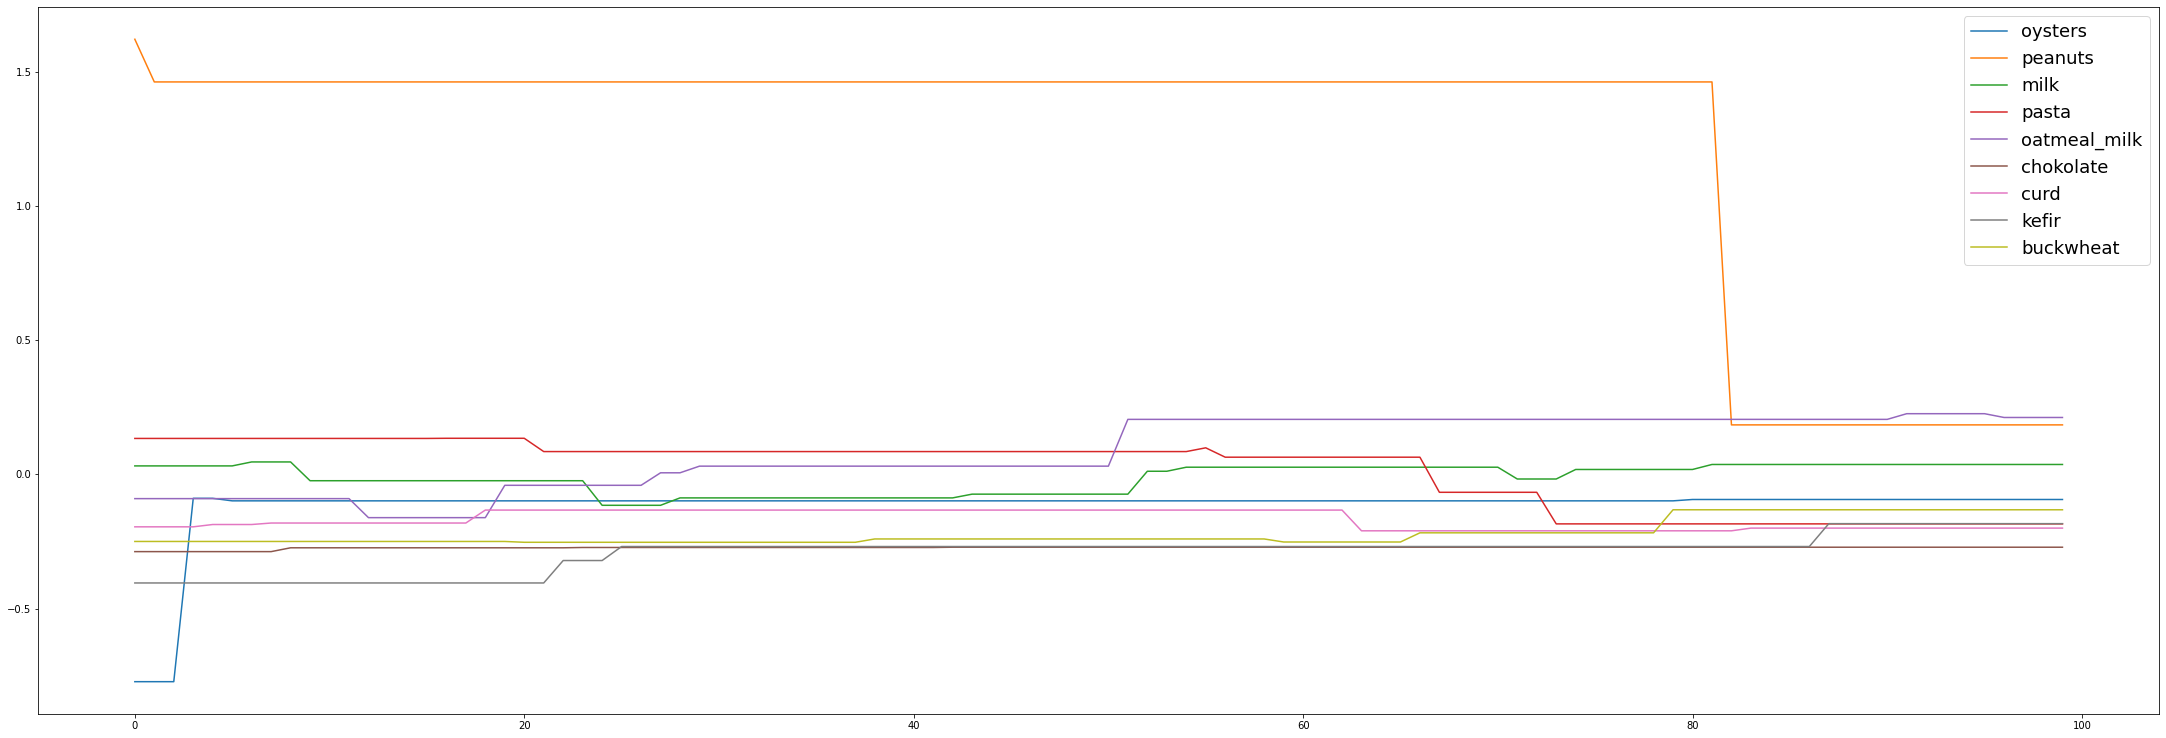

In [149]:
a = rating(get_coord)

In [150]:
l=[]
for j in range(99): #получаем 100 разных координат
  a = np.array(get_coord)
  l.append(a)

Final_rating = np.array(get_coord)
for i in l: #Усредняем
  Final_rating  = [x+y for x, y in zip(Final_rating, i)]
Final_rating  = (np.array(Final_rating)/len(l)).tolist()

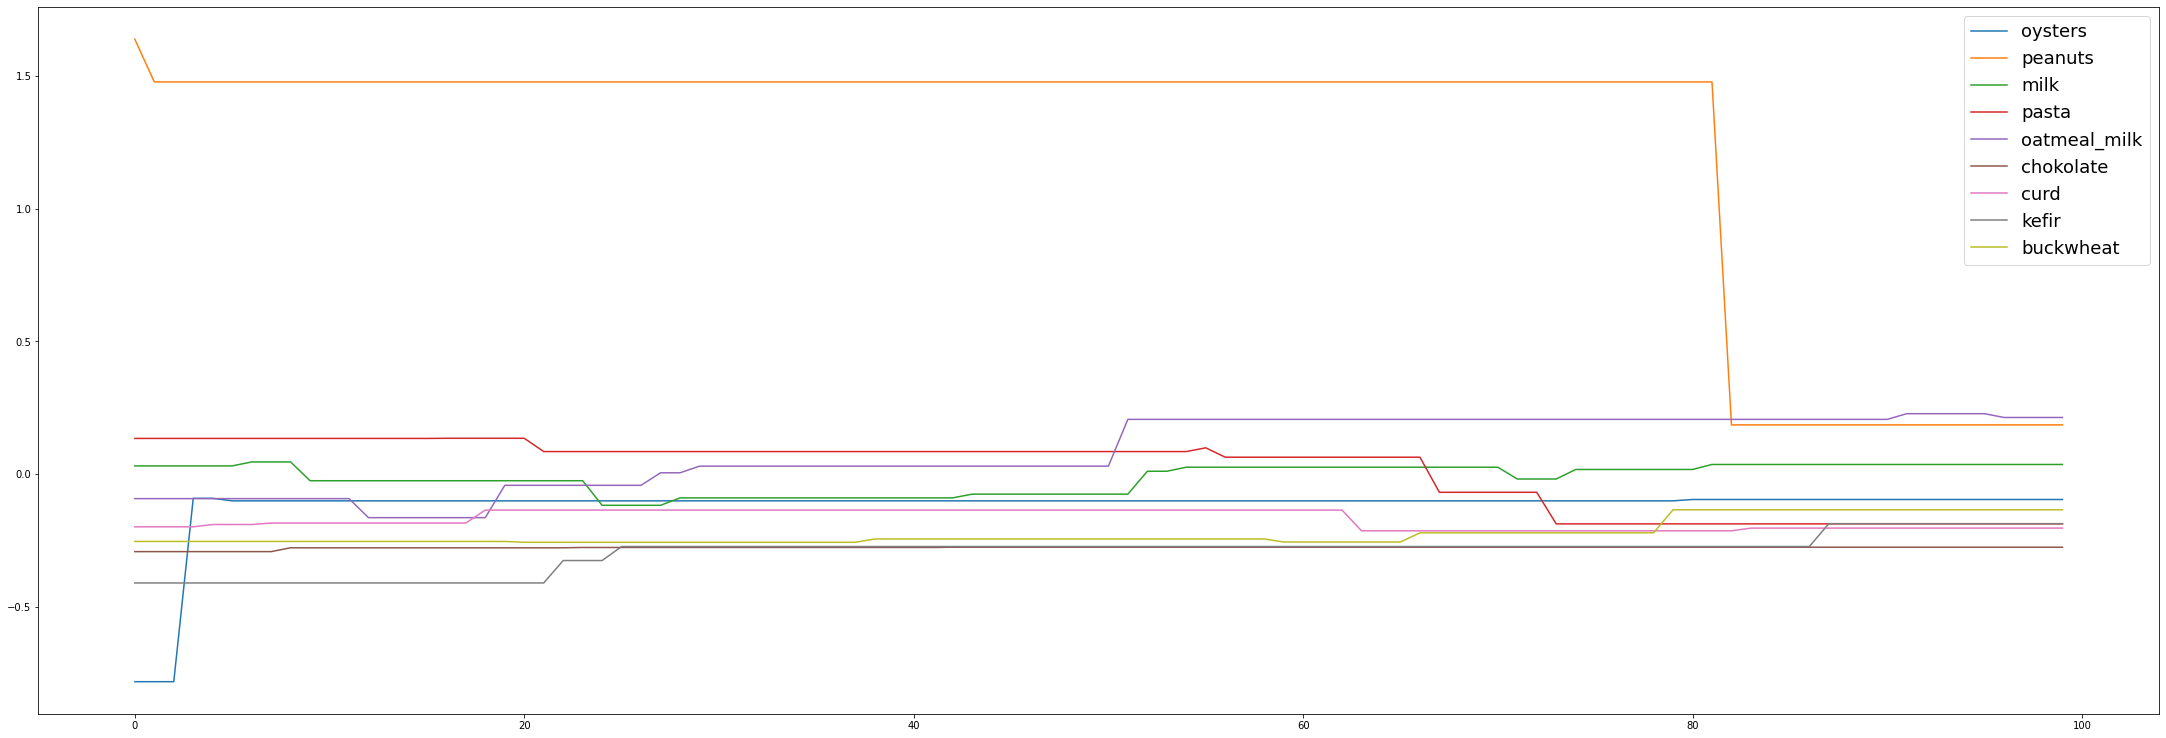

In [151]:
rating(Final_rating)

In [144]:
def get_point(fake, real = [9,1,3,2,4,7,5,8,6]):  
  all =zip(fake, real)
  nn = [i for i in range(1,10)]
  l1 =list(zip(nn,fake))
  l2 =list(zip(nn,real))
  name = ['oysters','peanuts', 'milk', "pasta","oatmeal_milk", 'chokolate' , "curd", "kefir","buckwheat"]

  reg = LinearRegression().fit(l1,l2)
  line = [i for i in range(10)]
  # y = [reg.intercept_[0] + reg.coef_[0][0] * n for n in nn]
  y = nn
  print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

  fig, ax = plt.subplots(figsize=(10, 10))
  ax.plot(nn,y)
  ax.scatter(real,fake)
  for n,i in enumerate(all):
    ax.scatter(i[0],i[1],  label= name[n])
  ax.set_xlabel('Мой рейтинг')
  ax.set_ylabel('Чужой рейтинг')
  plt.legend()
  plt.show()


The linear model is: Y = -2.6645e-15 + 1.0X


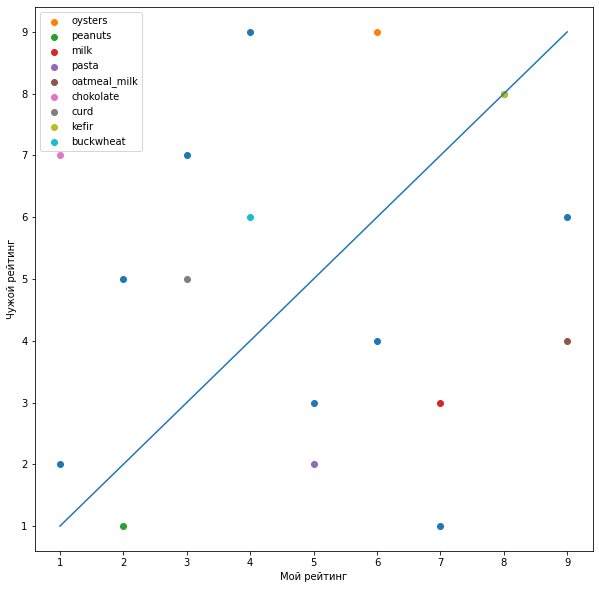

In [145]:
get_point([6,2,7,5,9,1,3,8,4])

The linear model is: Y = -8.8818e-16 + 1.0X


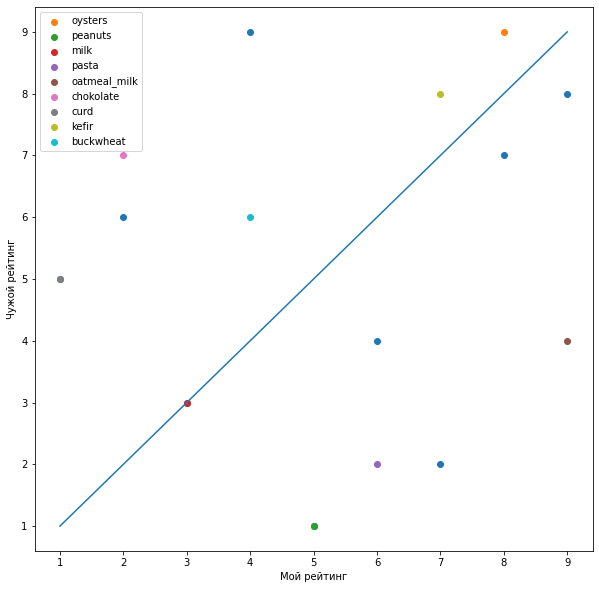

In [146]:
get_point([8,5,3,6,9,2,1,7,4])

**Выводы: Вероятно из-за StandardScaler() рейтинг всегда получается одинаковым и те методы замены нанов, что я реализовал , практически никак не сказываются на устойчивость самого рейтинга. Однако если убрать StandardScaler() , то из за повышенной калорийности некоторых продуктов первая главная компонента превышает на порядок остальные,  и смысл задачи пропадает вовсе, так как там уже нельзя говорить о како-либо устойчивости и объективности рейтинга**
